In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, cv2
from sklearn.model_selection import train_test_split

# load data from csv
DATA_DIR = "D://Projects//gamedev//unity//self-driving-car-simulator//data//2022-09-14 11_43_42//csv//record_log.csv"
data_df = pd.read_csv (DATA_DIR, names=['center', 'left', 'right', 'steering', 'speed'])
X_paths = data_df[['center', 'left', 'right']].values
y = data_df['steering'].values

print (len(X_paths))

4170


AxesImage(54,36;334.8x217.44)


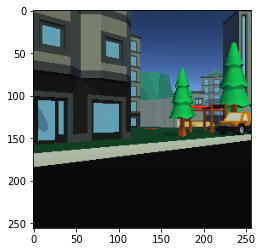

AxesImage(54,36;334.8x217.44)


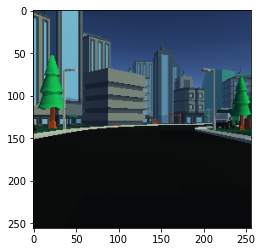

AxesImage(54,36;334.8x217.44)


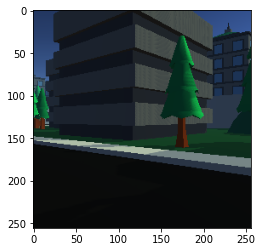

In [2]:
# display image loaded
image = cv2.cvtColor (cv2.imread (X_paths[0][0]), cv2.COLOR_BGR2RGB)
print (plt.imshow (image))
plt.show ()

image = cv2.cvtColor (cv2.imread (X_paths[0][1]), cv2.COLOR_BGR2RGB)
print (plt.imshow (image))
plt.show ()

image = cv2.cvtColor (cv2.imread (X_paths[0][2]), cv2.COLOR_BGR2RGB)
print (plt.imshow (image))
plt.show ()

(256, 256, 3)
AxesImage(54,36;334.8x217.44)


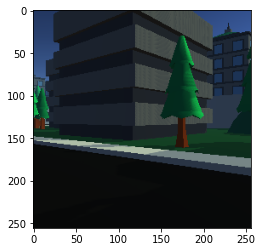

AxesImage(54,36;334.8x217.44)


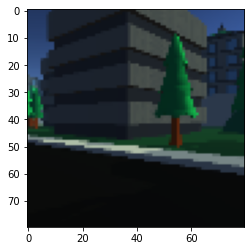

AxesImage(54,36;334.8x217.44)


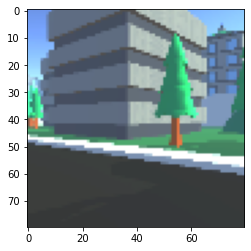

AxesImage(54,36;334.8x217.44)


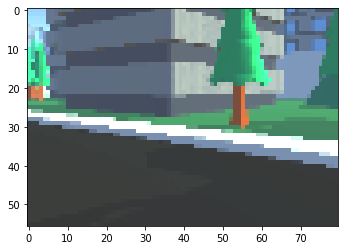

In [3]:
image = cv2.cvtColor (cv2.imread (X_paths[0][2]), cv2.COLOR_BGR2RGB)
print (image.shape)

print (plt.imshow (image))
plt.show ()
image = cv2.resize (image, (80, 80))
print (plt.imshow (image))
plt.show ()
image = cv2.convertScaleAbs(image, alpha=2, beta=40)
print (plt.imshow (image))
plt.show ()
image = image[20:76, :, :]
print (plt.imshow (image))
plt.show ()

In [6]:
# preprocess image
(IMG_WIDTH, IMG_HEIGHT) = (80, 80)

X = [[0, 0, 0]] * len (X_paths)

for i in range (len (X_paths)):
    for j in range (len (X_paths[i])):
        image = cv2.cvtColor (cv2.imread (X_paths[i][j]), cv2.COLOR_BGR2RGB)
        image = cv2.resize (image, (IMG_WIDTH, IMG_HEIGHT))
        image = cv2.convertScaleAbs(image, alpha=2, beta=40)
        image = image[20:76, :, :]
        image = cv2.cvtColor (image, cv2.COLOR_RGB2YUV)
        X[i][j] = (image)
    

AxesImage(54,36;334.8x217.44)


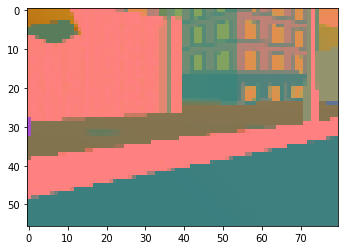

AxesImage(54,36;334.8x217.44)


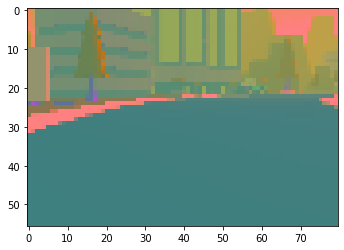

AxesImage(54,36;334.8x217.44)


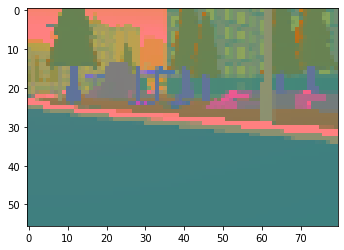

In [7]:
# display preprocessed image
print (plt.imshow (X[50][0]))
plt.show ()

print (plt.imshow (X[50][1]))
plt.show ()

print (plt.imshow (X[50][2]))
plt.show ()

In [4]:
# convert to image array 
X = np.array(X, dtype=object)
y = np.array(y)

# reshape image array
(CROP_WIDTH, CROP_HEIGHT) =  len(X[0][0][0]), len(X[0][0])
for i in range(len(X_paths)):
    for j in range(len(X_paths[i])):
        X[i][j] = np.array(X[i][j]).reshape(-1, CROP_HEIGHT, CROP_WIDTH, 3)
        
print (CROP_WIDTH)
print (CROP_HEIGHT)

NameError: name 'X' is not defined

In [7]:
# build model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, Lambda
from keras.optimizers import Adam

X = X/255.0

model = Sequential()
model.add(Lambda(lambda x: x/127.5-1.0, input_shape=X.shape[1:]))
model.add(Conv2D(24, (5, 5), strides=(2, 2), activation='elu'))

model.add(Conv2D(36, (5, 5), strides=(2, 2)))
model.add (Activation ('elu'))
model.add(Conv2D(48, (3, 3), strides=(1, 1)))
model.add (Activation ('elu'))

model.add(Dropout(0.1))

model.add(Flatten())

model.add(Dense(1))
model.add (Activation ('sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 3, 56, 80, 3)      0         
                                                                 
 conv2d (Conv2D)             (None, 3, 26, 38, 24)     1824      
                                                                 
 conv2d_1 (Conv2D)           (None, 3, 11, 17, 36)     21636     
                                                                 
 activation (Activation)     (None, 3, 11, 17, 36)     0         
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 9, 15, 48)      15600     
                                                                 
 activation_1 (Activation)   (None, 3, 9, 15, 48)      0         
                                                                 
 dropout (Dropout)           (None, 3, 9, 15, 48)      0

In [8]:
# compile model
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('model.h5', monitor='val_loss', verbose=1, mode='auto', save_best_only=True)

model.compile(loss="mean_squared_error", optimizer=Adam(learning_rate=1.0e-4), metrics=['accuracy'])

In [9]:
# Training Model
X = np.asarray(X).astype('float32')
model.fit(X, y, batch_size=32, epochs=20, validation_split=0.3, callbacks=[checkpoint])

Epoch 1/20
91/92 [============================>.] - ETA: 0s - loss: 0.1116 - accuracy: 0.5711
Epoch 1: val_loss improved from inf to 0.09922, saving model to model.h5
92/92 [==============================] - 10s 96ms/step - loss: 0.1117 - accuracy: 0.5718 - val_loss: 0.0992 - val_accuracy: 0.4884
Epoch 2/20
91/92 [============================>.] - ETA: 0s - loss: 0.1104 - accuracy: 0.5721
Epoch 2: val_loss improved from 0.09922 to 0.09883, saving model to model.h5
92/92 [==============================] - 9s 98ms/step - loss: 0.1105 - accuracy: 0.5721 - val_loss: 0.0988 - val_accuracy: 0.4884
Epoch 3/20
91/92 [============================>.] - ETA: 0s - loss: 0.1103 - accuracy: 0.5718
Epoch 3: val_loss did not improve from 0.09883
92/92 [==============================] - 9s 96ms/step - loss: 0.1105 - accuracy: 0.5721 - val_loss: 0.1023 - val_accuracy: 0.4884
Epoch 4/20
91/92 [============================>.] - ETA: 0s - loss: 0.1105 - accuracy: 0.5725
Epoch 4: val_loss improved from 0.09

In [10]:
accuracy = model.evaluate(X, y, verbose=0)
print (accuracy)

[0.10624877363443375, 0.547002375125885]


In [1]:
import os, cv2
import matplotlib.pyplot as plt
data_dir = "D:\\Projects\\gamedev\\unity\\self-driving-car-simulator\\data\\2022-09-14 11_43_42\\predict\\"

(IMG_WIDTH, IMG_HEIGHT) = (80, 80)
data = [[0, 0, 0]]
i = 0

for img in os.listdir (data_dir):
    image = cv2.cvtColor (cv2.imread (os.path.join(data_dir, img)), cv2.COLOR_BGR2RGB)
    image = cv2.resize (image, (IMG_WIDTH, IMG_HEIGHT))
    image = cv2.convertScaleAbs(image, alpha=2, beta=40)
    image = image[20:76, :, :]
    image = cv2.cvtColor (image, cv2.COLOR_RGB2YUV)
    data[0][i] = (image)
    i += 1

In [3]:
import numpy as np
data = np.array (data)
print (data[0].shape)
for i in range (3):
    data[0][i] = np.array(data[0][i]).reshape (-1, CROP_HEIGHT, CROP_WIDTH, 3)
data = data/255.0


(3, 56, 80, 3)


NameError: name 'CROP_HEIGHT' is not defined

In [13]:
prediction = model.predict (data)
print (prediction)

1/1 [==============================] - 0s 144ms/step
[[0.20645522]]


In [ ]:
from sklearn import metrics
accuracy = metrics.accuracy_score([[0.35]], prediction)